Требуется 4031 итераций


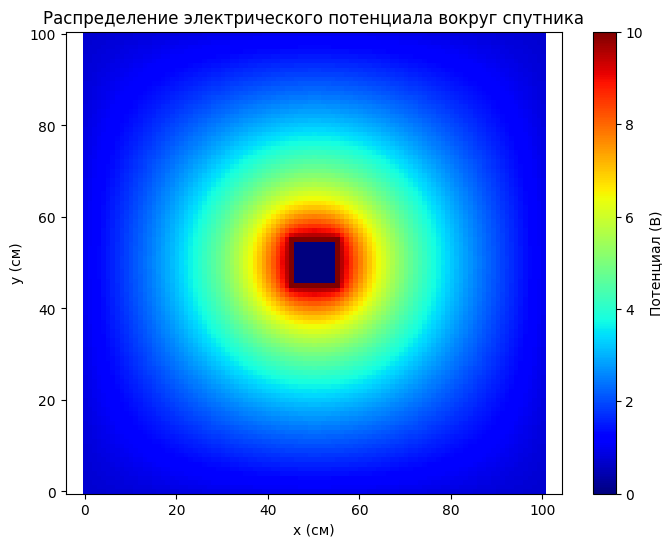

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
L = 100  # Размер области (100 см)
N = 101  # Число узлов сетки (равномерное разбиение)
dx = L / (N - 1)  # Шаг сетки

# Граничные условия
U0 = 10.0  # Потенциал на поверхности спутника (Вольт)
R0 = 5  # Радиус спутника (5 см)

# Создание сетки
U = np.zeros((N, N))

center_index = N // 2  # Центр спутника

# Итеративное решение уравнения Лапласа
max_iter = 10000
tolerance = 1e-4

for iteration in range(max_iter):
    U_old = U.copy()

    for i in range(1, N - 1):
        for j in range(1, N - 1):
            # Проверяем, находимся ли мы на границе спутника
            if np.sqrt((i - center_index)**2 + (j - center_index)**2) < np.sqrt(R0**2):
                if (np.sqrt((i - center_index)**2 + (j - center_index)**2) != 0):
                    pass
            else:
                # Уравнение Лапласа
                U[i, j] = 0.25 * (U_old[i + 1, j] + U_old[i - 1, j] +
                                  U_old[i, j + 1] + U_old[i, j - 1])

    # Граничное условие на поверхности спутника
    for i in range(center_index - R0, center_index + R0 + 1):
        for j in range(center_index - R0, center_index + R0 + 1):
            if abs(i - center_index) == R0 or abs(j - center_index) == R0:
                U[i, j] = U0
            else:
                U[i, j] = 0


    for i in range(N):
        U[0, i] = U[N-1, i] = U[i, 0] = U[i, N-1] = R0 * U0 / np.sqrt(center_index * center_index + (i - center_index) ** 2)

    # Проверка на сходимость
    if np.max(np.abs(U - U_old)) < tolerance:
        print(f"Требуется {iteration} итераций")
        break

# Визуализация
plt.figure(figsize=(8, 6))
plt.imshow(U, cmap='jet')
plt.colorbar(label='Потенциал (В)')
plt.title('Распределение электрического потенциала вокруг спутника')
plt.xlabel('x (см)')
plt.ylabel('y (см)')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()
